# 1. Introduction
The approach I took was I added 300 images of each finger count in the training set to improve the model. Also used a different method of augmentation and different resize method (ReseizeMethod.Squish). The reason I added more images was to get the model to understand what each image looks like better. I chose ResizeMethod.Squish for resize because it captured the whole image of the fingers. ResizeMethod.Squish worked best I tried ResizeMethod.Crop and ResizeMethod.Reflection and it did not have the best results with training, validation and 2 test datas. I also tried differenet augmnetations but overall the ones i used for this one gave the best rests. I tried 10 different models with differently structed datablocks. 


# 2. Model training and Results
Any code to train a model and produce results or a reference to the notebook/code file.

In [1]:
!pip install -q fastbook

import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *

In [ ]:
images = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=GrandparentSplitter('train','valid'), 
    get_y=parent_label, 
    item_tfms=Resize(640, ResizeMethod.Squish),
    batch_tfms=aug_transforms(size=420, do_flip=True))


In [ ]:
set_seed(42,True)
dls = images.dataloaders("/content/gdrive/MyDrive/Colab Notebooks/", batch_size=32, seed=42, CropPad=(200))

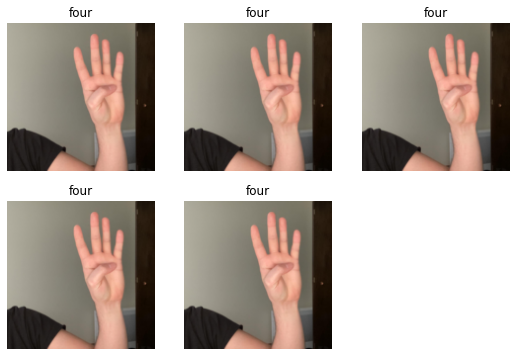

In [ ]:
dls.valid.show_batch(max_n=5, unique=True)

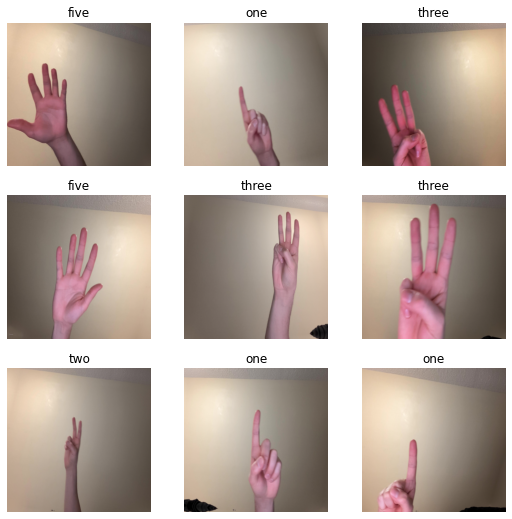

In [ ]:
dls.train.show_batch()

SuggestedLRs(valley=0.0008317637839354575)

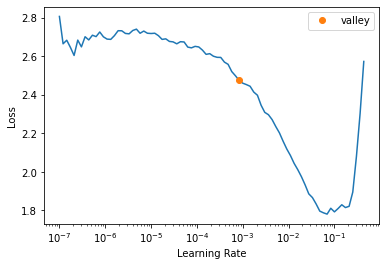

In [ ]:
set_seed(42,True)
images = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=GrandparentSplitter('train','valid'), 
    get_y=parent_label, 
    item_tfms=Resize(640, ResizeMethod.Squish),
    batch_tfms=aug_transforms(size=420, do_flip=True))
dls = images.dataloaders("/content/gdrive/MyDrive/Colab Notebooks/", batch_size=32, seed=42)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.lr_find()

In [ ]:
set_seed(42,True)
images = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=GrandparentSplitter('train','valid'), 
    get_y=parent_label, 
    item_tfms=Resize(640, ResizeMethod.Squish),
    batch_tfms=aug_transforms(size=420, do_flip=True))
dls = images.dataloaders("/content/gdrive/MyDrive/Colab Notebooks/", batch_size=32, seed=42)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(2, base_lr= 9e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.240621,1.278448,0.560000,01:31


epoch,train_loss,valid_loss,accuracy,time
0,0.352039,2.540633,0.800000,01:40
1,0.188277,0.000184,1.000000,01:40


SuggestedLRs(valley=3.981071586167673e-06)

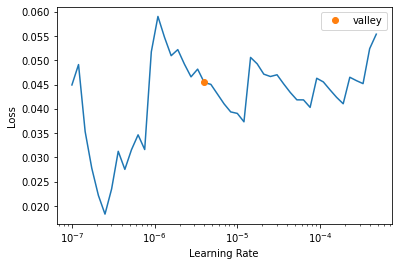

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.fit_one_cycle(1, lr_max= 4e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.053959,0.000302,1.000000,01:40


In [6]:
set_seed(42,True)
images = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=GrandparentSplitter('train','valid'), 
    get_y=parent_label, 
    item_tfms=Resize(640, ResizeMethod.Squish),
    batch_tfms=aug_transforms(size=420, do_flip=True))
dls = images.dataloaders("/content/gdrive/MyDrive/Colab Notebooks/", batch_size=32, seed=42, CropPad=(200))
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(2, base_lr= 9e-3)
learn.unfreeze()
learn.fit_one_cycle(1, lr_max= 4e-6)

epoch,train_loss,valid_loss,accuracy,time
0,1.206690,3.358158,0.300000,01:23


epoch,train_loss,valid_loss,accuracy,time
0,0.400207,0.971503,0.720000,01:28
1,0.247327,0.023130,1.000000,01:30


epoch,train_loss,valid_loss,accuracy,time
0,0.051210,0.013510,1.000000,01:30


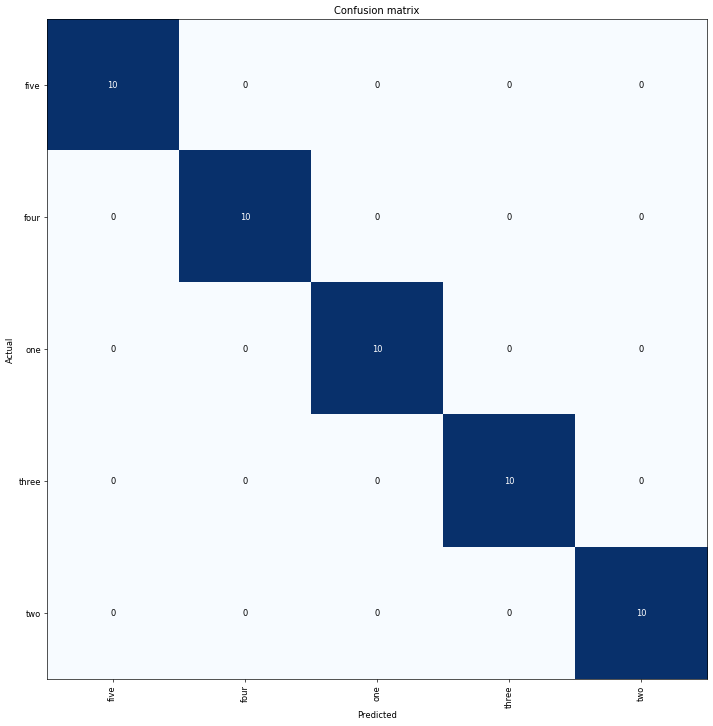

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [9]:
learn.export(fname=("/content/gdrive/MyDrive/Colab Notebooks/bestimageclassifier2.pkl"))


In [10]:
learn = load_learner('/content/gdrive/MyDrive/Colab Notebooks/bestimageclassifier2.pkl')

# 3. Summary and Conclusion
Summarize your new results and state your lab3 and lab4 results.


Conclusion: How large is the improvement in the performance of the classifier due to the approach chosen? Include your interpretation why it worked (or did not work).

# 4. Reflection
Include a sentence or two about
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating

while working on this assignment.

*YOUR ANSWER HERE*

